In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('fer2013.csv')
df.shape

(35887, 3)

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
print(df['Usage'].value_counts())

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64


In [5]:
df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

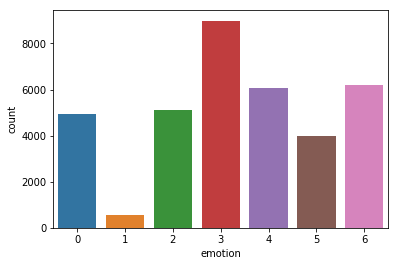

In [6]:
sns.countplot(df.emotion)
plt.show()

[]

[]

Text(0.5, 1.0, 'anger')

[]

[]

Text(0.5, 1.0, 'anger')

[]

[]

Text(0.5, 1.0, 'anger')

[]

[]

Text(0.5, 1.0, 'anger')

[]

[]

Text(0.5, 1.0, 'anger')

[]

[]

Text(0.5, 1.0, 'anger')

[]

[]

Text(0.5, 1.0, 'anger')

[]

[]

Text(0.5, 1.0, 'disgust')

[]

[]

Text(0.5, 1.0, 'disgust')

[]

[]

Text(0.5, 1.0, 'disgust')

[]

[]

Text(0.5, 1.0, 'disgust')

[]

[]

Text(0.5, 1.0, 'disgust')

[]

[]

Text(0.5, 1.0, 'disgust')

[]

[]

Text(0.5, 1.0, 'disgust')

[]

[]

Text(0.5, 1.0, 'fear')

[]

[]

Text(0.5, 1.0, 'fear')

[]

[]

Text(0.5, 1.0, 'fear')

[]

[]

Text(0.5, 1.0, 'fear')

[]

[]

Text(0.5, 1.0, 'fear')

[]

[]

Text(0.5, 1.0, 'fear')

[]

[]

Text(0.5, 1.0, 'fear')

[]

[]

Text(0.5, 1.0, 'happiness')

[]

[]

Text(0.5, 1.0, 'happiness')

[]

[]

Text(0.5, 1.0, 'happiness')

[]

[]

Text(0.5, 1.0, 'happiness')

[]

[]

Text(0.5, 1.0, 'happiness')

[]

[]

Text(0.5, 1.0, 'happiness')

[]

[]

Text(0.5, 1.0, 'happiness')

[]

[]

Text(0.5, 1.0, 'sadness')

[]

[]

Text(0.5, 1.0, 'sadness')

[]

[]

Text(0.5, 1.0, 'sadness')

[]

[]

Text(0.5, 1.0, 'sadness')

[]

[]

Text(0.5, 1.0, 'sadness')

[]

[]

Text(0.5, 1.0, 'sadness')

[]

[]

Text(0.5, 1.0, 'sadness')

[]

[]

Text(0.5, 1.0, 'surprise')

[]

[]

Text(0.5, 1.0, 'surprise')

[]

[]

Text(0.5, 1.0, 'surprise')

[]

[]

Text(0.5, 1.0, 'surprise')

[]

[]

Text(0.5, 1.0, 'surprise')

[]

[]

Text(0.5, 1.0, 'surprise')

[]

[]

Text(0.5, 1.0, 'surprise')

[]

[]

Text(0.5, 1.0, 'neutral')

[]

[]

Text(0.5, 1.0, 'neutral')

[]

[]

Text(0.5, 1.0, 'neutral')

[]

[]

Text(0.5, 1.0, 'neutral')

[]

[]

Text(0.5, 1.0, 'neutral')

[]

[]

Text(0.5, 1.0, 'neutral')

[]

[]

Text(0.5, 1.0, 'neutral')

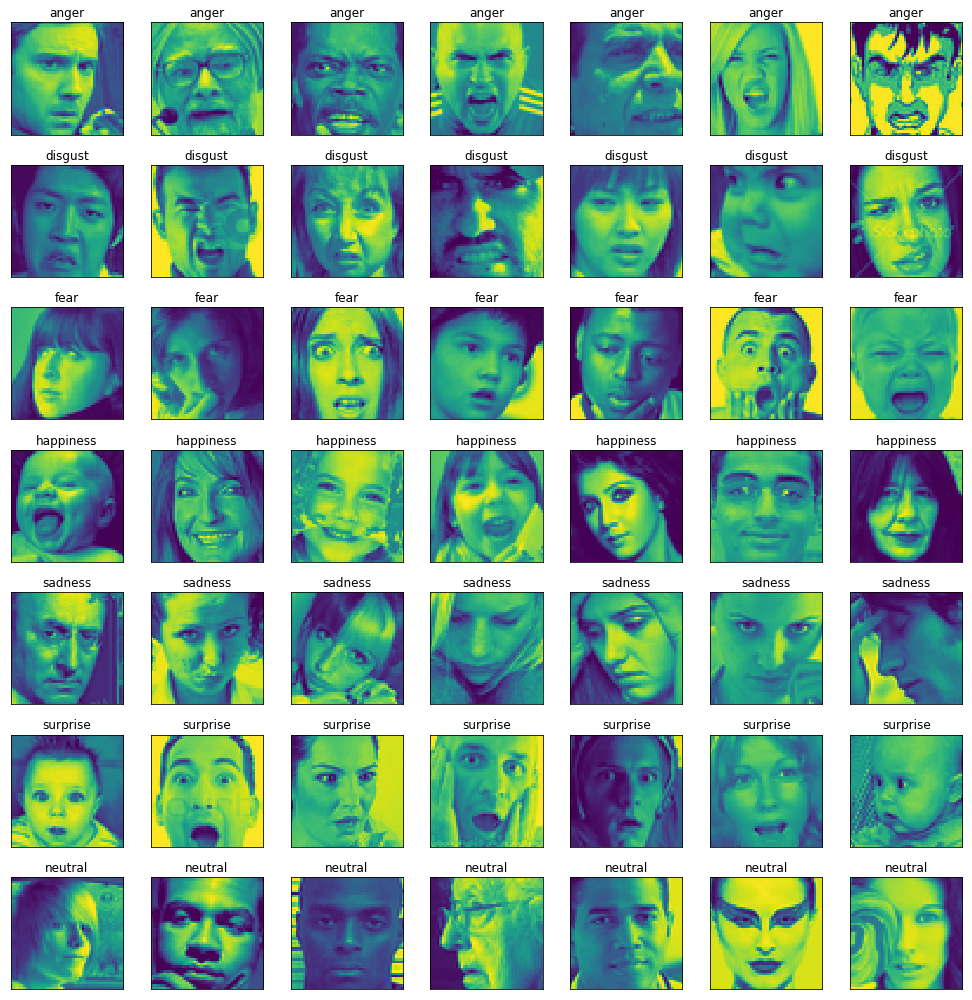

In [7]:
# Visualize some examples from the dataset.
fig = plt.figure(1, (14, 14))
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}
classes = sorted(df.emotion.unique())

k = 0
for label in classes:
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [8]:
#reading string values and saving them as an array of independent features
y = df.emotion
pixels_str = df.to_numpy()[:,1]
row_num = pixels_str.shape[0]
row_length = 48*48
X = np.zeros((row_num,row_length))
for row in range(row_num):
    X[row] = np.fromstring(pixels_str[row], dtype=np.float, sep=' ')

In [9]:
print('number of data points: ', X.shape[0])
print('pictre lenth as vector: ', X.shape[1])

number of data points:  35887
pictre lenth as vector:  2304


In [10]:
# Pixels normalization
X = X/255
print(X)

[[0.2745098  0.31372549 0.32156863 ... 0.41568627 0.42745098 0.32156863]
 [0.59215686 0.58823529 0.57647059 ... 0.75686275 0.71764706 0.72156863]
 [0.90588235 0.83137255 0.61176471 ... 0.34509804 0.43137255 0.59607843]
 ...
 [0.06666667 0.06666667 0.0627451  ... 0.60392157 0.52156863 0.44313725]
 [0.11764706 0.10980392 0.10980392 ... 0.1372549  0.11764706 0.10980392]
 [0.0745098  0.05098039 0.05490196 ... 0.74117647 0.78039216 0.78823529]]


In [11]:
# merge data together
df = pd.DataFrame(X).add_prefix("px_")
df['emotion'] = y

In [12]:
df.head()

,px_0,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_2295,px_2296,px_2297,px_2298,px_2299,px_2300,px_2301,px_2302,px_2303,emotion
0,0.274510,0.313725,0.321569,0.282353,0.227451,0.227451,0.235294,0.247059,0.211765,0.227451,...,0.713725,0.717647,0.533333,0.415686,0.454902,0.372549,0.415686,0.427451,0.321569,0
1,0.592157,0.588235,0.576471,0.607843,0.580392,0.521569,0.435294,0.549020,0.666667,0.682353,...,0.423529,0.372549,0.423529,0.400000,0.262745,0.670588,0.756863,0.717647,0.721569,0
2,0.905882,0.831373,0.611765,0.643137,0.682353,0.541176,0.631373,0.678431,0.713725,0.784314,...,0.541176,0.596078,0.478431,0.447059,0.396078,0.380392,0.345098,0.431373,0.596078,2
3,0.094118,0.125490,0.141176,0.117647,0.125490,0.090196,0.074510,0.078431,0.117647,0.160784,...,0.494118,0.517647,0.517647,0.521569,0.533333,0.545098,0.556863,0.560784,0.556863,4
4,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.121569,0.121569,0.121569,0.105882,0.121569,0.117647,0.113725,0.117647,6


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Columns: 2305 entries, px_0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 631.1 MB


In [14]:
# calculating correlations
correlations = df.corr().filter(['emotion']).drop(['emotion'])

In [15]:
# show top 150 correlated pixels
top_cor = correlations.abs().sort_values(kind="quicksort",by=['emotion']).iloc[::-1][:149]
top_cor

,emotion
px_1456,0.108582
px_1408,0.107349
px_1504,0.106707
px_1503,0.105727
px_1455,0.102692
px_1551,0.102115
px_1552,0.100529
px_1361,0.100110
px_1360,0.100011
px_1409,0.099442


In [16]:
index_list = np.append(np.array(top_cor.index),'emotion')
norm_selected_df = df[index_list]
norm_selected_df.head()

,px_1456,px_1408,px_1504,px_1503,px_1455,px_1551,px_1552,px_1361,px_1360,px_1409,...,px_82,px_12,px_14,px_29,px_1217,px_1612,px_36,px_28,px_83,emotion
0,0.654902,0.674510,0.639216,0.635294,0.654902,0.627451,0.619608,0.698039,0.701961,0.662745,...,0.654902,0.349020,0.474510,0.670588,0.705882,0.713725,0.443137,0.619608,0.454902,0
1,0.360784,0.388235,0.349020,0.337255,0.439216,0.243137,0.384314,0.376471,0.364706,0.450980,...,0.533333,0.600000,0.678431,0.631373,0.474510,0.654902,0.631373,0.650980,0.423529,0
2,0.650980,0.772549,0.670588,0.556863,0.611765,0.772549,0.764706,0.654902,0.800000,0.533333,...,0.792157,0.152941,0.541176,0.862745,0.980392,0.788235,0.635294,0.850980,0.682353,2
3,0.482353,0.486275,0.529412,0.584314,0.643137,0.592157,0.588235,0.513725,0.435294,0.529412,...,0.384314,0.125490,0.082353,0.435294,0.529412,0.482353,0.752941,0.384314,0.505882,4
4,0.580392,0.552941,0.603922,0.580392,0.588235,0.556863,0.600000,0.501961,0.552941,0.486275,...,0.662745,0.011765,0.090196,0.596078,0.533333,0.811765,0.325490,0.600000,0.576471,6


In [17]:
norm_selected_df.shape

(35887, 150)

In [18]:
norm_selected_df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [19]:
# save the file as csv 
# IMPORTANT: necessary to set index as False
norm_selected_df.to_csv('norm_selected_pixels.csv', index=False)